# Решение прямой задачи


In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
def g_Psi(t):
    frame = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\scenaeei.csv", names=['Year','Country', 'Value'])
    frame.drop(index=0, inplace=True)
    newframe=frame.groupby("Year").mean()
    Year=np.linspace(1950,3000,1051)
    newframe["Year"]=Year
    AB=[0]*newframe["Year"].size
    for i in range(newframe["Value"].size-1):
        A=[[newframe["Year"][i],1],[newframe["Year"][i+1],1]]
        B=[newframe["Value"][i],newframe["Value"][i+1]]
        AB[i]=np.linalg.solve(A,B)
    for i in range(newframe["Value"].size):
        if(i<t<i+1):
            return AB[i][0]*t+AB[i][1]
        if(t==i):
            return newframe["Value"][i]
    
def g_fi(t):
    frame = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\scenacei.csv", names=['Year','Country', 'Value'])
    frame.drop(index=0, inplace=True)
    newframe=frame.groupby("Year").mean()
    Year=np.linspace(1950,3000,1051)
    newframe["Year"]=Year
    AB=[0]*newframe["Year"].size
    for i in range(newframe["Value"].size-1):
        A=[[newframe["Year"][i],1],[newframe["Year"][i+1],1]]
        B=[newframe["Value"][i],newframe["Value"][i+1]]
        AB[i]=np.linalg.solve(A,B)
    for i in range(newframe["Value"].size):
        if(i<t<i+1):
            return AB[i][0]*t+AB[i][1]
        if(t==i):
            return newframe["Value"][i]

In [3]:
T=30 #временной промежуток(лет) (1990-2019)

## $M_t$ - уровень загрязнения $CO_2$

In [4]:
M = [0] * T
PSI = [0] * T 
FI = [0] * T
alpha = [0] * T 
Y = [0] * T  

In [5]:
Carbon_tax=pd.read_excel("C:\\Users\DanilAdmin\Downloads\\CT.xlsx", sheet_name="Data_Price")

tau=[0]*T

for i in range(T):
    tau[i]=Carbon_tax["Price_rate_2_"+str(i+1990)].sum()

for i in range(T):
        alpha[i]=1-0.01*tau[i]/(1+0.01*tau[i])

PSI[0]=55
FI[0]=21
for i in range(T-1):
        PSI[i+1]=g_Psi(int(i)+40)*PSI[i]-alpha[i]*tau[i]
        FI[i+1]=g_fi(int(i)+40)*FI[i]-alpha[i]*tau[i]
        
        

In [6]:
GDP = pd.read_csv("C:\\Users\DanilAdmin\Downloads\WorldGDP.csv")

GDP_list=[]
for i in range(1990,2020):
    GDP_list.append(GDP[str(i)])



Y=[0]*len(GDP_list)
for i in range(len(GDP_list)):
    Y[i]=GDP_list[i][0]*10**(-6) #В миллионах долларов


In [7]:
for i in range(T):
        M[i]=PSI[i]*FI[i]*Y[i]

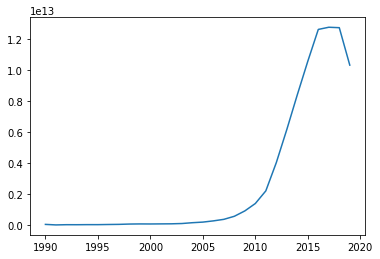

In [8]:
t=np.linspace(1990,2019,30)
plt.plot(t,M)

## $C_t$ - затраты на сокращение выбросов

In [9]:
C = [0] * T 
H = [0] * T  #нужны начальные данные

In [10]:
betta=0.784
H[0]=125

for i in range(1,T):
    H[i]=H[i-1]*(1+tau[i])**(1/2)

for i in range(T):
    C[i]=(betta*(tau[i])**2)/H[i]*Y[i]

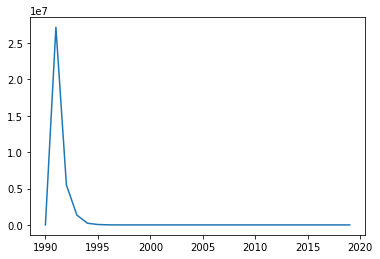

In [12]:
plt.plot(t,C)

## $E^B_t$ - выбросы наземной биосферы

In [13]:
E_b=[0] * T #нужны начальные данные
T_t = [0] * T #нужны начальные данные
B = [0] * T #нужны начальные данные
RF = [0] * T 
CS=3.0
alpha_=-42.7
betta_l=29.1
betta_q=0.001
beta=2.6
B_max=1900
T_2010=T_t[20] #температура в 2010 году

In [14]:
GDP_PC = pd.read_csv("C:\\Users\DanilAdmin\Downloads\GDP_per_capita.csv")

GDP_list=[]
for i in range(1990,2020):
    GDP_list.append(GDP_PC[str(i)])



GDP_per_capita=[0]*len(GDP_list)
for i in range(len(GDP_list)):
    GDP_per_capita[i]=GDP_list[i][0] #долларов

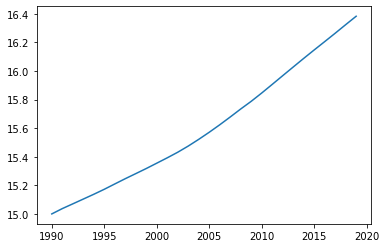

In [15]:
rfso2= pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\\rfso2.csv", names=["Year","Value"])

CH4em = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\ch4em.csv", names=['Year','Country', 'Value'])
CH4em.drop(index=0, inplace=True)
CH4=CH4em.groupby("Year").sum()
Year=np.linspace(1950,3000,1051)
CH4["Year"]=Year

N2Oem = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\\n2oem.csv", names=['Year','Country', 'Value'])
N2Oem.drop(index=0, inplace=True)
N2O=N2Oem.groupby("Year").sum()
Year=np.linspace(1950,3000,1051)
N2O["Year"]=Year

CO2em=pd.read_csv("C:\\Users\DanilAdmin\Downloads\CO2em.csv")
CO2em.drop(CO2em[CO2em.country !="World"].index, inplace=True)
CO2em.drop(CO2em[CO2em.year<1990].index, inplace=True)

CO2=[0]*T
for i in range(T):
    CO2[i]=CO2em.co2[i+23421]

SF6=[0]*T

for i in range(T):
    SF6[i]=5.4083*10**(-6)*Y[i]-5.8961*10**(-5)*GDP_per_capita[i]

def RF(t):
    return 5.35*np.log(CO2[int(t)]/275)+0.036*1.4*(np.sqrt(CH4["Value"][int(t)+40])-np.sqrt(790))+0.12*(np.sqrt(N2O["Value"][int(t)+1990])-np.sqrt(285))-0.47*np.log(1+2.01*(10**(-5))*((CH4["Value"][int(t)+40])**0.75)*(285**0.75)+5.31*(10**(-15))*((CH4["Value"][int(t)+40])*2.52)*((285)**1.52))-0.47*np.log(1+2.01*(10**(-5))*((N2O["Value"][int(t)+1990])**0.75)*(790**0.75)+5.31*(10**(-15))*((N2O["Value"][int(t)+1990])*1.52)*((790)**2.52))+2*0.47*np.log(1+2.01*(10**(-5))*((790)**0.75)*(285**0.75)+5.31*(10**(-15))*((790)*2.52)*((285)**1.52))+0.00052*(SF6[int(t)]-0.04)+rfso2["Value"][t+40]

def eft(alpha,betta_l,CS,betta_q):
    return max(alpha+betta_l*CS+betta_q*CS**2,1)

CS=3.0
T_t[0]=15.0

for i in range(1,T):  
    T_t[i]=(1-1/eft(-42.7,29.1,3.0,0.001))*T_t[i-1]+1/eft(-42.7,29.1,3.0,0.001)*CS*abs(RF(int(i)))/(5.35*np.log(2))
    
plt.plot(t,T_t)

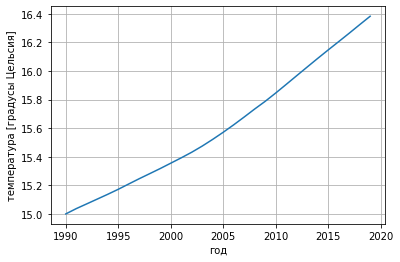

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
y = x*(x - 2)*(x - 4)

fig, ax = plt.subplots()

ax.plot(t, T_t)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('год')
ax.set_ylabel('температура [градусы Цельсия]')

plt.show()


In [17]:
E_b[0]=154
B[0]=550

for i in range(1,T):
    B[i]=B[i-1]-E_b[i-1]
    E_b[i]=beta*(T_t[i]-T_2010)*B[i]/B_max
    

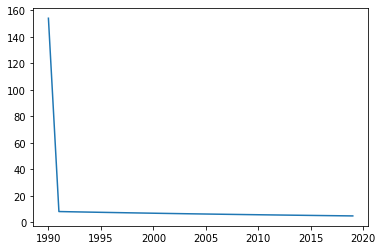

In [18]:
plt.plot(t,E_b)

## $C_t$ - концетрации газов

In [19]:
C_CH4= [0] * T
C_N2O= [0] * T
C_SF6=[0]*T
E = [0] * T 

In [20]:
#Для CH4 и N2O

alpha=[0.3597,0.2079,0.0398]
betta=[1/12,1/114,1/3200]
C_pre=[790,285,0.04]

CH4em = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\ch4em.csv", names=['Year','Country', 'Value'])
CH4em.drop(index=0, inplace=True)
CH4=CH4em.groupby("Year").sum()
Year=np.linspace(1950,3000,1051)
CH4["Year"]=Year


N2Oem = pd.read_csv("C:\\Users\DanilAdmin\Downloads\MimiFUND.jl-master\data\\n2oem.csv", names=['Year','Country', 'Value'])
N2Oem.drop(index=0, inplace=True)
N2O=N2Oem.groupby("Year").sum()
Year=np.linspace(1950,3000,1051)
N2O["Year"]=Year


C_CH4[0]=1710
C_N2O[0]=309
C_SF6[0]=0.09

N2O_=[0]*T
for i in range(T):
    N2O_[i]=N2O["Value"][i+1990]

CH4_=[0]*T
for i in range(T):
    CH4_[i]=CH4["Value"][i+40]

for i in range(1,T):
    C_CH4[i]=C_CH4[i-1]+alpha[0]*CH4_[i]-betta[0]*(C_CH4[i-1]-C_pre[0])
    C_N2O[i]=C_N2O[i-1]+alpha[1]*N2O_[i]-betta[1]*(C_N2O[i-1]-C_pre[1])
    C_SF6[i]=C_SF6[i-1]+alpha[2]*SF6[i]-betta[2]*(C_SF6[i-1]-C_pre[2])



In [21]:
SF6[20]

482.45893342181034

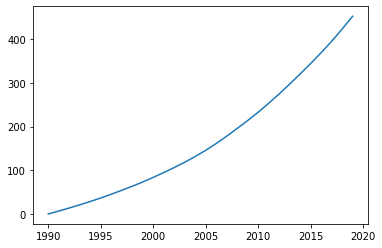

In [22]:
plt.plot(t,C_SF6)

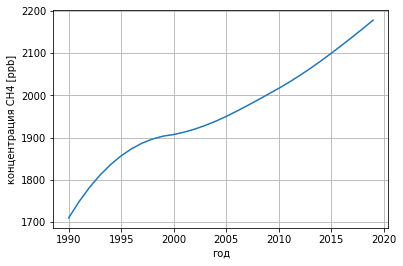

In [43]:
fig, ax = plt.subplots()

ax.plot(t, C_CH4)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('год')
ax.set_ylabel('концентрация CH4 [ppb]')

plt.show()


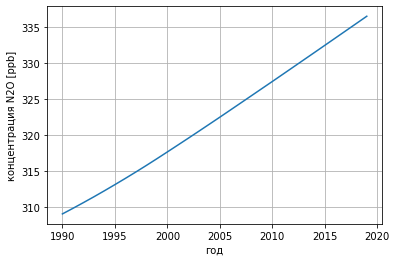

In [50]:
fig,ax = plt.subplots()

ax.plot(t, C_N2O)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('год')
ax.set_ylabel('концентрация N2O [ppb]')

plt.show()


In [27]:
#Для CO2

Box=[[0]*(T)]*5 #40=1990-1950(потому что начальные данные для 1950)

#Начальные значения для Box, непонятно, зачем нужны, если нет зависимости от прошлого 
#Box[0][0]=296.002949511
#Box[1][0]=5.52417779186
#Box[2][0]=6.65150094285
#Box[3][0]=2.39635475726
#Box[4][0]=0.17501699667

alpha=[0.13,0.20,0.32,0.25,0.10]
ro=[np.exp(-1/float("inf")),np.exp(-1/363),np.exp(-1/74),np.exp(-1/17),np.exp(-1/2)]

for i in range(5):
    for j in range(1,T):
        Box[i][j]=Box[i][j]*ro[i]+0.000471*alpha[i]*M[j]
#ro[0]=1 => Box сокращяется с обеих сторон       
        
C_CO2=[0]*T


for i in range(T):
    for j in range(5):
        C_CO2[i]+=alpha[j]+Box[j][i]

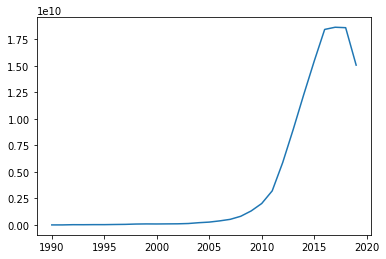

In [28]:
plt.plot(t,C_CO2)

## $S_t$ - глобальный средний уровень моря

In [53]:
S=[0]*T

ro=500
gamma=2

S[0]=-28.31

for i in range(1,T):
    S[i]=(1-1/ro)*S[i-1]+gamma/ro*T_t[i]

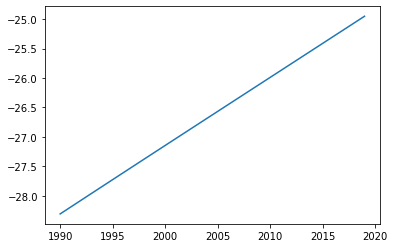

In [54]:
plt.plot(t,S)

## $A^r_t$ - доля ущерба в сельскохозяйственном производстве, обусловленная скоростью изменения климата

In [31]:
A_r=[0]*T

alpha=0.03
betta=2.0 #1.5-2.5
ro=10 #5-15

A_r[0]=0

for i in range(1,T):
    A_r[i]=alpha*((T_t[i]-T_t[i-1])/0.04)**betta+(1-1/ro)*A_r[i-1]

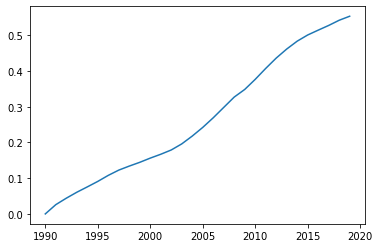

In [33]:
plt.plot(t,A_r)